In [1]:
%reload_ext autoreload
%autoreload 2
%run startup.py
from tqdm.auto import tqdm
from itertools import chain
from functools import reduce

from trajectory.planner import Segment, SegmentList, Joint

AttributeError: 'SegmentList' object has no attribute 'step_positions'

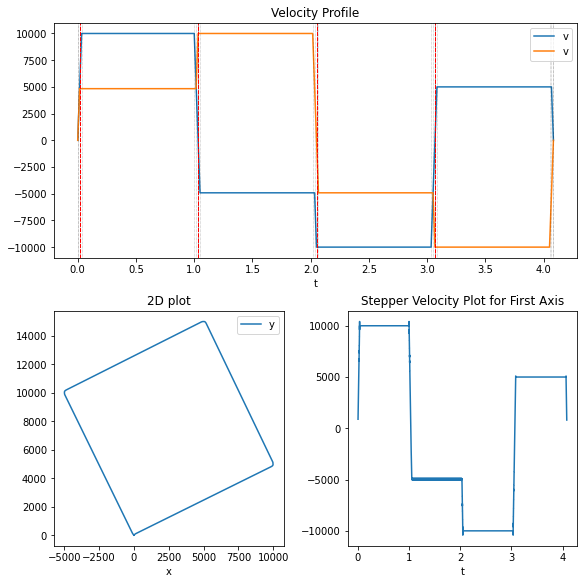

In [2]:
%%time
from trajectory.plot import seg_step 

j = Joint(10_000, 300_000)
joints = [j]*2

sl = SegmentList(joints)  

x = 10000

sl.move([x,x/2])
sl.move([-x/2,x])
sl.move([-x,-x/2])
sl.move([x/2,-x])

df = seg_step(sl)

stepper_plot(sl)
print(sl.step_positions, sl.move_positions)

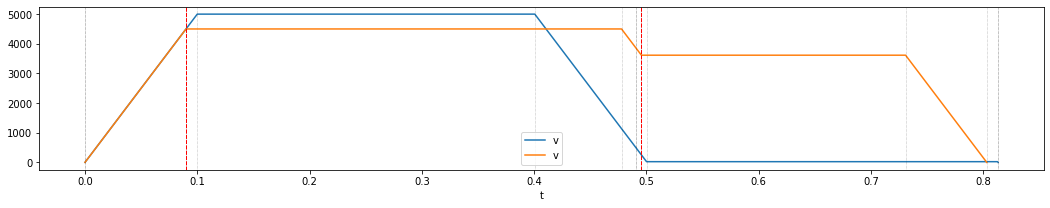

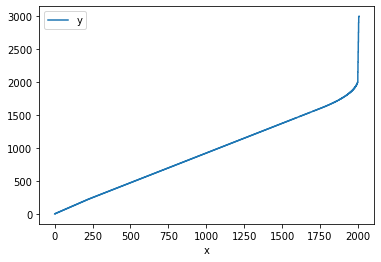

In [3]:


j = Joint(5_000, 50_000)
joints = [j]*2

sl = SegmentList(joints)  
x = 2000
sl.move([x,x])
sl.move([10,1000])

sl.plot()
step_plot(sl)  

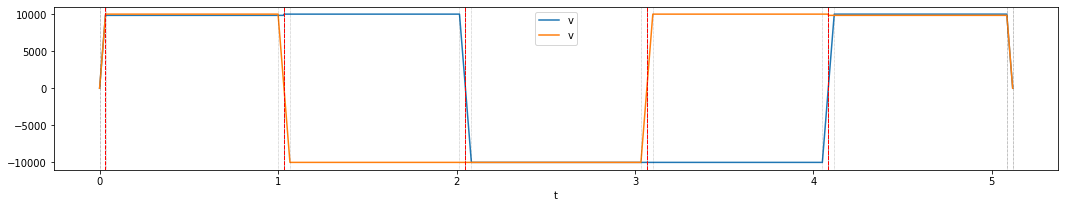

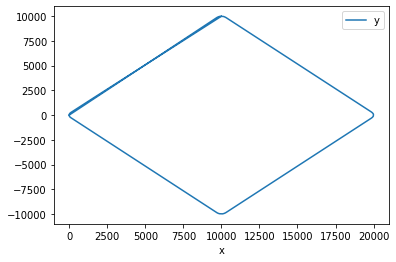

In [4]:
%reload_ext autoreload
%autoreload 2
%run startup.py
from tqdm.auto import tqdm

from trajectory.planner import Segment, SegmentList, Joint

j = Joint(10_000, 300_000)
joints = [j]*2

sl = SegmentList(joints)  
x = 10000

sl.move([x,x])
sl.move([x,-x])
sl.move([-x,-x])
sl.move([-x,x])
sl.move([x,x])
 
sl.plot()
step_plot(sl) 

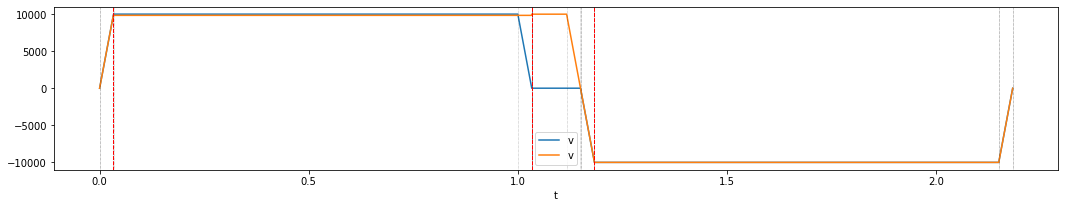

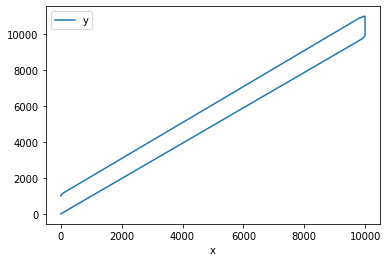

In [5]:
%run startup.py
from tqdm.auto import tqdm

from trajectory.planner import Segment, SegmentList, Joint

j = Joint(10_000, 300_000)
joints = [j]*2

sl = SegmentList(joints)  
x = 10000

sl.move([x,x])
sl.move([1,1000])
sl.move([-x,-x])
 
sl.plot()
step_plot(sl) 

## R=2000 N=100 Tmean = 0.02629669801980198

N Discont,0,N Replans,5450,Errors,[]
Reductions,"[('V1A', 1186), ('V1B', 682), ('V0B', 50), ('V0A', 44)]",Replans,"[(8, 46), (6, 34), (4, 19), (0, 1)]",Time Err,0.0033


AttributeError: 'SegmentList' object has no attribute 'planner_positions'

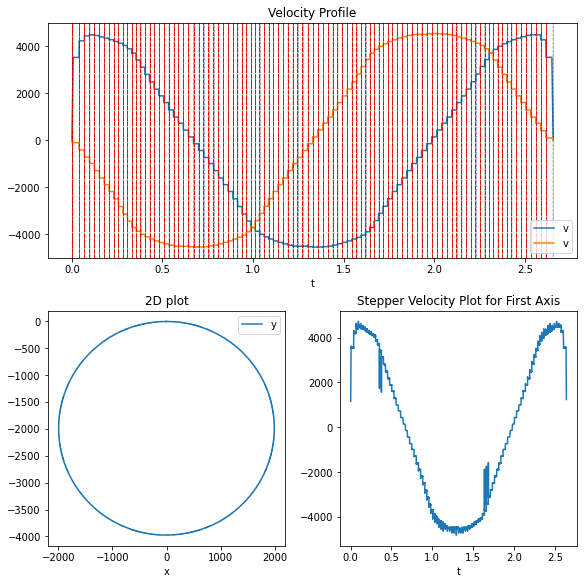

In [6]:
%reload_ext autoreload
%autoreload 2
%run startup.py
from trajectory.plot import  * 
from math import sin, cos, sqrt
from trajectory.planner import Segment, SegmentList, Joint

from trajectory.plot import * 
j = Joint(15_000, 500_000)

def make_circle(j, r=5000, n=100):
   
    joints = [j]*2

    sl = SegmentList(joints)   
    r = r
    lx  = 0
    ly = r
    for i in range(0,n+1):
        a = 2*np.pi*(i/n)
        x = sin(a)*r 
        y = cos(a)*r 

        sl.move((round(x-lx),round(y-ly)))
        lx = x
        ly = y
            
    t_m = np.mean(list(chain(*[s.times for s in sl])))
    display(Markdown(f"## R={r} N={n} Tmean = {t_m}"))     

    
    #sl.plot();plt.show()
    #fig, ax = plt.subplots(1,figsize=(12,12))
    stepper_plot(sl)
    report(sl)
    return sl
 
sl = make_circle(j, 2000, 100)
print(sl.planner_positions, sl.step_positions)

In [ ]:
from trajectory.plot import * 
df = seg_step(sl, details=True)
dfv = step_v_df(sl)
df.xe.plot()

In [ ]:
from trajectory.plot import * 
df = seg_step(sl, details=True)
dfv = step_v_df(sl)
df.xe.plot()

In [ ]:
tm = 1.011880
t = df.reset_index()
t = t[t.t.between(tm-.00005,tm+.0005)]
t[t.s!=0]

In [ ]:
tm = 1.011984
t = t[t.t.between(tm-.00005,tm+.00005)]
t

In [ ]:
t = df.reset_index()
nz = t[t.s!=0].copy()
nz['vc'] = 1/( nz.t.diff()) * nz.s
nz['v_err'] = (nz.v-nz.vc)
nz.plot.scatter('v','vc')

In [ ]:
t = df.reset_index().join(nz[['vc']])
t['vce'] = t.v-t.vc
t.sort_values('vce', ascending=False)

In [ ]:
idx = 233019
t.iloc[idx-10:idx+10]

In [ ]:
#
# Calculate velocity profile directly from steps
#
j = Joint(5_000, 50_000)
joints = [j]*2

sl = SegmentList(joints)  

x = 1000

sl.move([x,x/2])
sl.move([x/2,x])

ax = sl.plot()

step_v_plot(sl)

In [ ]:
from trajectory.stepper import * 

j = Joint(5_000, 50_000)
joints = [j]*2

sl = SegmentList(joints)  

x = 1000

sl.move([x,x/2])
sl.move([x/2,x])
sl.move([x,x/2])
sl.move([x/2,x])
sl.move([x,x/2])
sl.move([x/2,x])
ss = SegmentStepper(sl, details = True)

l = list(ss)
    

In [ ]:
from trajectory.stepper import * 

j = Joint(5_000, 50_000)
joints = [j]*2

sl = SegmentList(joints)  

x = 1000

for i in range(5):
    if i%2 == 0:
        sl.jmove(.2,[x,x/2])
        print(sl.queue_time)
        sl.plot()
    else:
        sl.jmove(.2, [x/2,x])
        print(sl.queue_time)
        sl.plot()


In [ ]:
3%3